In [1]:
import cv2
import os 

import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

import matplotlib.pyplot as plt

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.5 when it was built against 1.14.6, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
dataset = utils.image_dataset_from_directory(
	directory = "D:/dog vs cat/train/",
	image_size=(224, 224),
 	batch_size=32
)

for img, label in dataset.take(1):
	print(img.shape)
	print(label.shape)

Found 20000 files belonging to 2 classes.
(32, 224, 224, 3)
(32,)


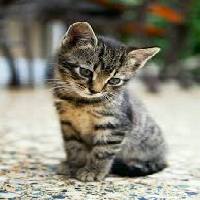

In [3]:
img = image.load_img("D:/dog vs cat/cat.jpeg", target_size=(200, 200))
img

In [4]:
type(img)

PIL.Image.Image

In [5]:
data_generator = ImageDataGenerator(
	rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5, 1.5),
    fill_mode='constant' # reflect, nearest
)   

In [6]:
img = image.img_to_array(img)

In [7]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(200, 200, 3)


In [8]:
input_batch = img.reshape(1, 200, 200, 3)

In [9]:
i = 0

for batch in data_generator.flow(input_batch, batch_size=1, save_to_dir="D:/dog vs cat/aug"):
    
    i = i + 1
    if i == 10:
        break
    

## Creating new data from old data for whole directory

In [10]:
mydir = "D:/dog vs cat/train"
categories = ["cats", "dogs"]

In [11]:
train_data = []

for i in categories:
    folder_path = os.path.join(mydir, i)
    
    if i == "cat":
        label = 0
    else:
        label = 1
        
    counter = 0 
        
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        train_data.append([img, label])
        counter = counter + 1
        
        if counter == 100:
            break

In [15]:
print(len(train_data))

200


In [13]:
np.random.shuffle(train_data)

In [16]:
X = []
y = []

for i in train_data:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [18]:
print(X.shape)
print(y.shape)

(200, 224, 224, 3)
(200,)


In [20]:
X = X/255
print(X.shape)

(200, 224, 224, 3)


In [21]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='constant' # reflect, nearest
)   

test_data_gen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_data_gen.flow_from_directory(
	"D:/dog vs cat/train",
	target_size=(150, 150),
	batch_size=16,
	class_mode='binary' # binary_crossentropy
)

test_generator = test_data_gen.flow_from_directory(
	"D:/dog vs cat/test",
	target_size=(150, 150),
	batch_size=16,
	class_mode='binary' # binary_crossentropy
)



Found 20000 images belonging to 2 classes.
Found 4995 images belonging to 2 classes.


In [27]:
model = Sequential([
	Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
	MaxPooling2D(2, 2),
 
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D(2, 2),
 
	Flatten(),
	Dense(64, activation='relu'),
	Dropout(0.5),
	Dense(1, activation='sigmoid')
])

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(
    train_generator,
    steps_per_epoch=2000 // 16,
    epochs=5,
    validation_data=test_generator,
    validation_steps=800 // 16
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.5615 - loss: 0.6855 - val_accuracy: 0.5688 - val_loss: 0.6461
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 232ms/step - accuracy: 0.5590 - loss: 0.6771 - val_accuracy: 0.5150 - val_loss: 0.6886
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - accuracy: 0.5575 - loss: 0.6876 - val_accuracy: 0.5863 - val_loss: 0.6637
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - accuracy: 0.5645 - loss: 0.6786 - val_accuracy: 0.5962 - val_loss: 0.6753
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 214ms/step - accuracy: 0.5715 - loss: 0.6740 - val_accuracy: 0.6100 - val_loss: 0.6636
